In [59]:
import boto3
import json
from boto3 import client
from boto3.session import Session

In [60]:
#aws access and secret key
AWS_ACCESS_KEY_ID='AWS_ACCESS_KEY_ID'
AWS_SECRET_ACCESS_KEY='AWS_SECRET_ACCESS_KEY'

In [85]:
REGION = 'us-east-1'
QUEUE_NAME='dev-sqs'
bucketDirectory="<buketName>"
buketName="medication/medication_input.json"

In [62]:
def create_sqs_queue():
    sqs = boto3.client("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    sqs_queue = sqs.create_queue(QueueName=QUEUE_NAME)       
    print(sqs_queue)

In [63]:
create_sqs_queue()

{u'QueueUrl': 'https://queue.amazonaws.com/822766594142/dev-sqs', 'ResponseMetadata': {'RetryAttempts': 0, 'HTTPStatusCode': 200, 'RequestId': 'e6370181-faf6-55a5-b850-5721f7bf56ae', 'HTTPHeaders': {'x-amzn-requestid': 'e6370181-faf6-55a5-b850-5721f7bf56ae', 'date': 'Mon, 20 Jan 2020 20:18:17 GMT', 'content-length': '319', 'content-type': 'text/xml'}}}


In [65]:
def get_queue_url():
    sqs = boto3.resource("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    queue_name=sqs.get_queue_by_name(QueueName=QUEUE_NAME)
    print(queue_name)

In [66]:
get_queue_url()

sqs.Queue(url='https://queue.amazonaws.com/822766594142/dev-sqs')


In [67]:
def list_queue_url():
    sqs = boto3.client("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    list_queues=sqs.list_queues(QueueName=QUEUE_NAME)
    print(list_queues)

In [97]:
def push_messages_to_sqs_queue():
    sqs = boto3.resource("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)
    queue = sqs.get_queue_by_name(QueueName=QUEUE_NAME)
    msg = queue.send_message(
        MessageBody="derp",
        MessageAttributes={
           "timestamp": {"StringValue": "1493147359900", "DataType": "Number"}
       },
    )

    messages = queue.receive_messages()
    #print(messages)

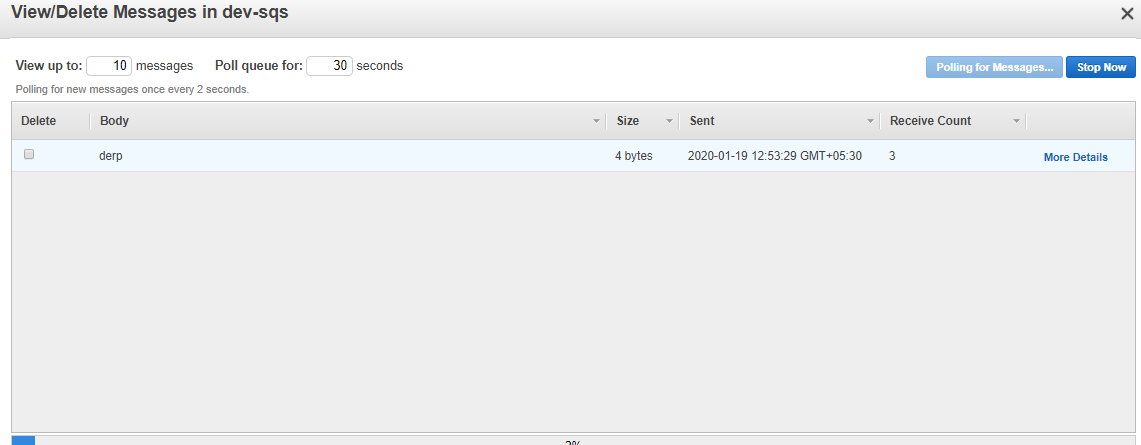

In [2]:
push_messages_to_sqs_queue()
from IPython.display import Image
Image(filename='sqs_push.png')

In [45]:
def get_messages_from_sqs_queue():
    sqs = boto3.resource("sqs",aws_access_key_id=AWS_ACCESS_KEY_ID,
                          aws_secret_access_key=AWS_SECRET_ACCESS_KEY, region_name=REGION)        
    queue_url = sqs.get_queue_by_name(QueueName=QUEUE_NAME)
    #connect sqs using boto3 
    sqs_client = boto3.client('sqs')
    msgs = sqs_client.receive_message(QueueUrl=queue_url,AttributeNames=['All'], MaxNumberOfMessages=10)
    return msgs['Messages']